In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.float_format', lambda x: '%.4f' % x) 
pd.set_option('display.max_rows', 10000) 

import warnings
warnings.filterwarnings('ignore')

In [23]:
import sqlite3

conn = sqlite3.connect('Coffee_rewards_database.db')
customers_df = pd.read_sql_query("SELECT * FROM customers", conn)

offers_df = pd.read_sql_query("SELECT * FROM offers", conn)
events_df = pd.read_sql_query("SELECT * FROM events_clean", conn)

print("Customers Table:")
display(customers_df.head())

print("Offers Table:")
display(offers_df.head())

print("Events Table:")
display(events_df.head())

Customers Table:


,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,None,118,None
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,None,118,None
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000
4,a03223e636434f42ac4c3df47e8bac43,20170804,None,118,None


Offers Table:


,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"


Events Table:


,customer_id,event,time,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


### DATA EXPLORATION

In [24]:
def basic_exploration(df, name):
    print(f"\n{'='*40}")
    print(f"📄 Exploring DataFrame: {name}")
    print(f"{'='*40}")
    
    print(f"\n🔹 Shape: {df.shape}") 
    
    print(f"\n🔹 Info:")
    df.info()
    
    print(f"\n🔹 Missing Values:")
    print(df.isnull().sum()) 
    
    print(f"\n🔹 Duplicate Rows: {df.duplicated().sum()}")
   
    print(f"\n🔹 First 5 Rows:")
    print(df.head()) 
    
    print(f"\n🔹 Summary Statistics:")
    print(df.describe(include='all')) 
   
for df, name in zip([customers_df, offers_df, events_df], ['customers_df', 'offers_df', 'events_df']):
    basic_exploration(df, name)


📄 Exploring DataFrame: customers_df

🔹 Shape: (17000, 5)

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       17000 non-null  object
 1   became_member_on  17000 non-null  int64 
 2   gender            14825 non-null  object
 3   age               17000 non-null  int64 
 4   income            14825 non-null  object
dtypes: int64(2), object(3)
memory usage: 664.2+ KB

🔹 Missing Values:
customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64

🔹 Duplicate Rows: 0

🔹 First 5 Rows:
                        customer_id  became_member_on gender  age  income
0  68be06ca386d4c31939f3a4f0e3dd783          20170212   None  118    None
1  0610b486422d4921ae7d2bf64640c50b          20170715      F   55  112000
2  38fe809add3b4fcf9315a9694bb96ff

## DATA CONSISTENCY CHECKS

<span style="color: orange;"
    > 
 Data consistency check i) customers ids in both customers dataframe and events data frame are same <br>
 </span>

In [25]:
# Get customer_ids from each dataframe
ids_customers = set(customers_df['customer_id'])
ids_events = set(events_df ['customer_id'])

# check if ids on both the lists are exactly same
print ("Are they the same ?" , ids_customers == ids_events)

# if there are any differences, show the differences of id
print("Only in customers_df "  ,ids_customers -ids_events)
print("Only in events_df "  ,ids_events - ids_customers)

Are they the same ? True
Only in customers_df  set()
Only in events_df  set()


<span style="color: orange;"
    > 
 Data consistency check ii) For each event type, I’m checking how many rows actually contain values in amount, reward, and offer_id <br>
 </span>

In [26]:
events_df.groupby('event').agg({'amount':'count', 'reward':'count', 'offer_id':'count'})

,amount,reward,offer_id
event,,,
offer completed,0,33579,33579
offer received,0,0,76277
offer viewed,0,0,57725
transaction,138953,0,0


<span style="color: orange;"
    > 
 Data consistency check iii) We have seen some ages have '118' for age variable - also there are exact same missing values in income and gender (2175) - let's find out if we can find anything there <br>
 </span>

In [27]:
# checks how many times 118 appears
print(" # of values = 118 in age " , (customers_df['age'] ==118).sum())

print(" # of missing values in income? - " , customers_df['income'].isna().sum())
print(" # of missing values in gender? - " , customers_df['gender'].isna().sum())

 # of values = 118 in age  2175
 # of missing values in income? -  2175
 # of missing values in gender? -  2175


### DATA CLEANING

####  Customers_df

#### Handling missing
##### Age, Income

In [28]:
# replacing age=118 with NaN ( treating them as missing)
customers_df['age'] = customers_df['age'].replace(118,np.nan)
# converting income variable to numeric
customers_df['income'] = pd.to_numeric(customers_df['income'] , errors ='coerce')

####  Capping - Age

In [29]:
customers_df['age'] = customers_df['age'].apply(lambda x:80 if x>80 else x)

In [30]:
customers_df.describe()

,became_member_on,age,income
count,17000.0000,14825.0000,14825.0000
mean,20167034.2341,53.9446,65404.9916
std,11677.5000,16.5667,21598.2994
min,20130729.0000,18.0000,30000.0000
25%,20160526.0000,42.0000,49000.0000
50%,20170802.0000,55.0000,64000.0000
75%,20171230.0000,66.0000,80000.0000
max,20180726.0000,80.0000,120000.0000


### Gender

In [31]:
customers_df['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [32]:
customers_df['gender'] = customers_df['gender'].replace ({ 'O' : 'Unknown'}).fillna('Unknown')

In [33]:
customers_df['gender'].unique()

array(['Unknown', 'F', 'M'], dtype=object)

#### Membership date - date-time format

In [34]:
customers_df.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,Unknown,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55.0000,112000.0000
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,Unknown,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75.0000,100000.0000
4,a03223e636434f42ac4c3df47e8bac43,20170804,Unknown,NaN,NaN


In [35]:
customers_df['became_member_on'] = pd.to_datetime(customers_df['became_member_on'] , format = '%Y%m%d')

In [36]:
customers_df.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,Unknown,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0000,112000.0000
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,Unknown,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0000,100000.0000
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,Unknown,NaN,NaN


#### Events_df

In [37]:
events_df=events_df.drop_duplicates()

In [38]:
events_df.duplicated().sum()

0

#### OUTLIER TREATMENT

#### Amount

In [39]:
events_df['amount'].describe()

count   138953.0000
mean        12.7774
std         30.2505
min          0.0500
25%          2.7800
50%          8.8900
75%         18.0700
max       1062.2800
Name: amount, dtype: float64

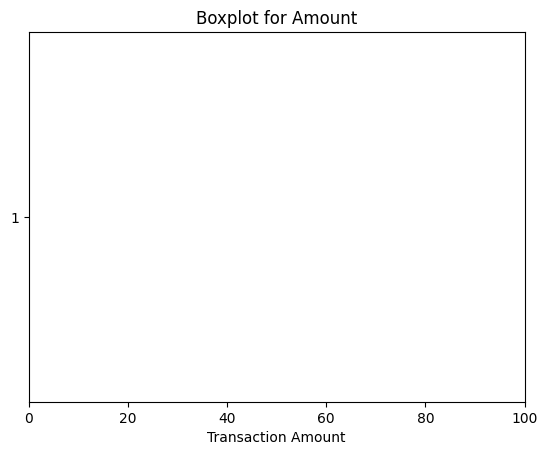

In [40]:
import matplotlib.pyplot as plt

plt.boxplot(events_df['amount'] , vert=False)
plt.title('Boxplot for Amount')
plt.xlabel('Transaction Amount')
plt.xlim(0,100) 
plt.show()

In [41]:
data= events_df['amount'].dropna()
data = data[data>0]

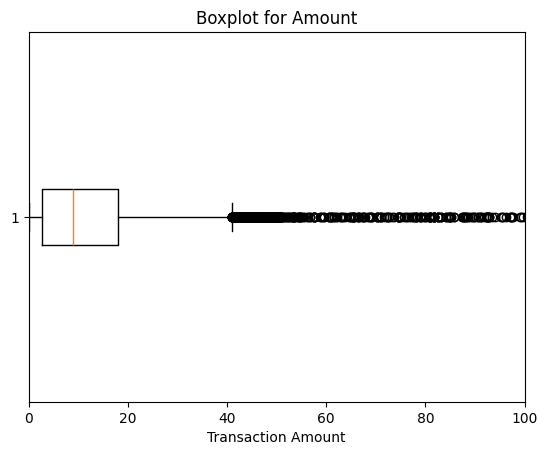

In [42]:
import matplotlib.pyplot as plt

plt.boxplot(data , vert=False)
plt.title('Boxplot for Amount')
plt.xlabel('Transaction Amount')
plt.xlim(0,100) 
plt.show()

🥇 1. Outliers can mess up averages <br>
🥈 2. Outliers can hide real patterns <br>
🥉 3. Outliers can confuse models

Treating the outlier

IQR - Interquartile Range : helps us understand what normal values look like.<br>
We split our data into four quarters.<br>
Q1 (25%) → the value below which 25% of data falls <br>
Q3 (75%) → the value below which 75% of data falls <br>
IQR = Q3 − Q1 → the middle spread of the data <br>

**If something is 1.5× IQR away from this middle 50%, it’s considered a possible outlier.**

In [43]:
# calculate Q1 and Q3 for the amount variable
Q1 = events_df['amount'].quantile(0.25)
Q3 = events_df['amount'].quantile(0.75)
IQR = Q3 - Q1   

# boundaries
lower_bound= max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

events_df.loc[:, 'amount'] = events_df['amount'].clip(lower=lower_bound, upper=upper_bound)

In [44]:
events_df['amount'].describe()

count   138953.0000
mean        11.3635
std          9.7786
min          0.0500
25%          2.7800
50%          8.8900
75%         18.0700
max         41.0050
Name: amount, dtype: float64

### DATA VISUALIZATION

#### 1. Customer Events per Day (30-day period)
Here we will see how the events activities spread across 30 days of the campaign

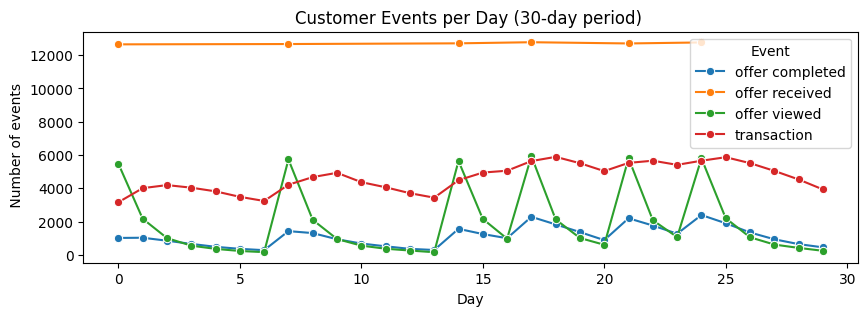

In [45]:
# Create a day columnn - Converts hours into day number (0–30). This becomes much easier to interpret than just hours.
events_df['day'] = events_df ['time']//24

# Then we will Count different events per day
events_by_day= (events_df.groupby(['day' ,'event']).size().reset_index(name='count'))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
sns.lineplot(data= events_by_day , x='day' , y='count' , hue ='event' , marker = 'o')
plt.title("Customer Events per Day (30-day period) ")
plt.xlabel("Day")
plt.ylabel(" Number of events")
plt.legend(title ='Event')
plt.show()

1. **Offers received** are high compared to other events -- almost 12K/day consistently over the period of 30 days
2. **Offer viewed and transaction** events seems to have similar peaks and valleys - this could be a weekly patterns, such as weekends, when customers might be more active or more likely to engage with offers and make purchases.
3. **Offers viewed** -  The number of offers viewed is also much lower than the number of offers received, indicating many customers don't even look at the offers they're sent.
4. **Offer completed** - least frequent -suggesting that only a small portion of offers received are actually redeemed

#### 2. Viewing Delay
Measures customer engagement speed. This tells how quickly customers notice or open an offer after receiving it.<br>
If the view delay is short, it means your offer is catching attention fast — customers are engaged.
If the delay is long, your message may not be reaching them effectively (e.g., poor timing, unappealing subject line, or wrong channel).
#### 3. Completion Delay
Measures conversion speed. This shows how long it takes customers to act (make a purchase, redeem an offer, etc.) after receiving it.<br>
A short completion delay means the offer is motivating and relevant.
A long delay might mean customers are interested but hesitant — maybe the offer isn’t strong enough or not easy to redeem.

In [46]:
# 1. Filter out only offer-related events
offer_events = events_df[events_df['event'].isin(['offer received', 'offer viewed', 'offer completed'])]

# 2. Create a pivot table
pivoted_df = offer_events.pivot_table(
    index=['customer_id', 'offer_id'],
    columns='event',
    values='time',
    aggfunc='min'  # Use min in case of duplicate events
).reset_index()

# If the same customer had multiple 'offer viewed' events (duplicates), we take the earliest one (minimum time).

# 3. Rename columns for convenience
pivoted_df.columns.name = None
pivoted_df.rename(columns={
    'offer received': 'received_time',
    'offer viewed': 'viewed_time',
    'offer completed': 'completed_time'
}, inplace=True)

pivoted_df['view_delay'] = pivoted_df['viewed_time'] - pivoted_df['received_time']
pivoted_df['completion_delay'] = pivoted_df['completed_time'] - pivoted_df['received_time']

pivoted_df.head()

,customer_id,offer_id,completed_time,received_time,viewed_time,view_delay,completion_delay
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0000,576.0000,NaN,NaN,0.0000
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,NaN,336.0000,372.0000,36.0000,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,NaN,168.0000,192.0000,24.0000,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,414.0000,408.0000,456.0000,48.0000,6.0000
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,528.0000,504.0000,540.0000,36.0000,24.0000


Text(0.5, 1.0, 'Distribution of Time Taken to View Offers')

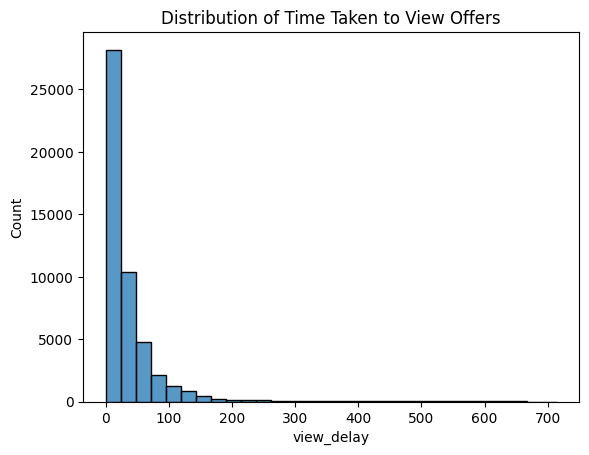

In [47]:
#Viewing Delay
sns.histplot(pivoted_df['view_delay'].dropna() , bins=30)
plt.title("Distribution of Time Taken to View Offers")

Text(0.5, 1.0, 'Distribution of Time Taken to Complete Offers')

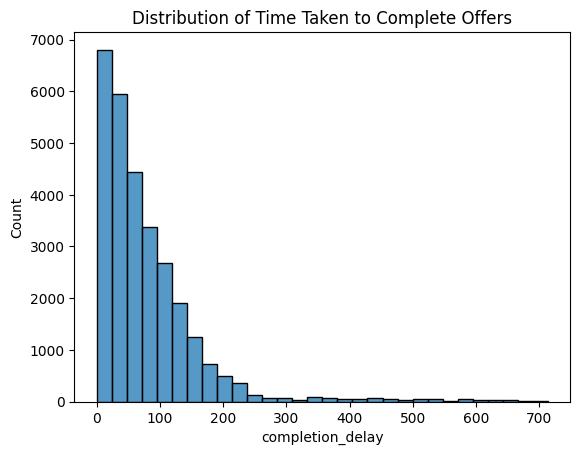

In [48]:
# COMPLETION DELAY
sns.histplot(pivoted_df['completion_delay'].dropna() , bins=30)
plt.title("Distribution of Time Taken to Complete Offers")

#### 4. Offer Performance by Type 

In [49]:
offer_events_merged = pivoted_df.merge(offers_df[['offer_id','offer_type']],on ='offer_id' , how= 'left')

offer_type_summary = offer_events_merged.groupby('offer_type').agg(
    received_count = ('received_time', 'count'),
    viewed_count   = ('viewed_time', 'count'),
    completed_count = ('completed_time', 'count')
).reset_index()

# 2. Calculate view and completion rates
offer_type_summary['view_rate'] = offer_type_summary['viewed_count'] / offer_type_summary['received_count']
offer_type_summary['completion_rate'] = offer_type_summary['completed_count'] / offer_type_summary['received_count']

offer_type_summary


,offer_type,received_count,viewed_count,completed_count,view_rate,completion_rate
0,bogo,25321,21546,13587,0.8509,0.5366
1,discount,25316,18280,15409,0.7221,0.6087
2,informational,12651,9309,0,0.7358,0.0000


<function matplotlib.pyplot.show(close=None, block=None)>

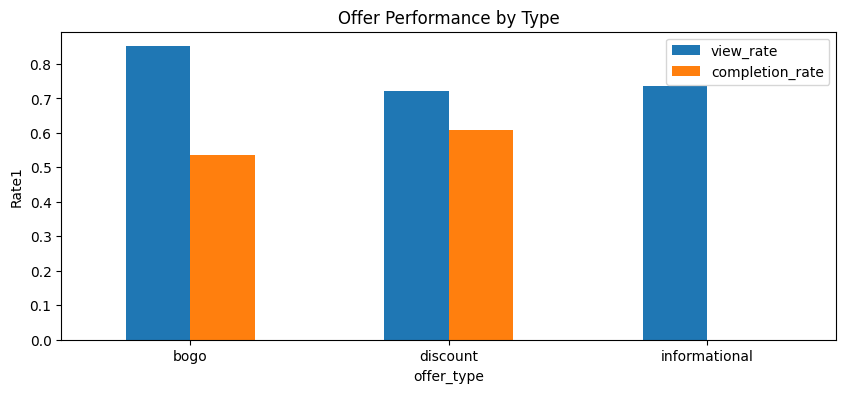

In [50]:
import matplotlib.pyplot as plt

offer_type_summary.plot(
x='offer_type',
    y=['view_rate', 'completion_rate'],
    kind='bar' ,
    figsize =(10,4),
title = 'Offer Performance by Type'    
)

plt.ylabel("Rate1")
plt.xticks(rotation=0)
plt.show

#### BOGO : <br>

-View Rate - 85% , Completion Rate - 54% <br>
-BOGO is the most effective in getting customers to look at and respond to an offer. It's a great tool for driving incremental traffic (getting a customer to visit when they otherwise wouldn't) but may not always be the most profitable, as it gives away a free item

#### Discount :<br>
-View Rate - 72% , Completion Rate - 61% <br>
Discounts are the most efficient path to purchase. They are better at ensuring that money is spent (which also helps with profitability) because he customer's cost is simply reduced, not duplicated (like with BOGO). This is the best type for increasing the average transaction value.

#### Informational : <br>
View Rate - 73%<br>
Informational offers are a useful tool for brand awareness and announcing products, but they should never be used for driving direct purchases or measuring conversion rate, as they are not designed to be completed. Students must learn to exclude these from completion analysis.

## Synthesizing Insights (Connecting the Charts)

Combining this chart with your first chart, **"Customer Events per Day,"** yields the following overall strategy:

| Chart | Insight | Actionable Strategy |
| :--- | :--- | :--- |
| **Offer Performance** | **Discount** has the highest $\mathbf{completion\_rate}$ ($\approx 61\%$). | **Priority Strategy:** Focus on creating highly personalized discount offers to maximize conversion efficiency. |
| **Customer Events** | **Offer Received** is flat and high (over 12k/day). | **Volume Strategy:** The high volume is likely what drives total completions, even with a low overall rate. Continue steady sending. |
| **Customer Events** | **Offer Completed** is low ($\approx 1,000-2,500$ per day). | **Targeting Strategy:** Even the best offthe completion line closer to the view line. |
| **Time to View/Complete** | Customers act with **urgency** (high initial peaks). | **Duration Strategy:** Use this data to justify running **shorter-duration offers** for both BOGO and Discount types to enhance the sense of urgency and maximize that initial completion spike. |

#### 5. Distribution of durations per offer type

we will find out how long each type of the offer runs

<Axes: xlabel='offer_type', ylabel='duration'>

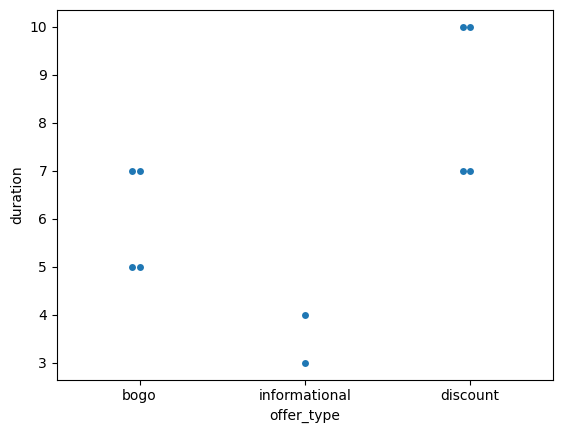

In [51]:
sns.swarmplot(x='offer_type' , y ='duration' , data=offers_df)

#### 6. Distribution of Offer Type and Channels
How different offers were promoted for this campaign across different channels (email, mobile, web, social). 

In [52]:
offers_df.head()

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']"
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']"


<Axes: xlabel='offer_type', ylabel='count'>

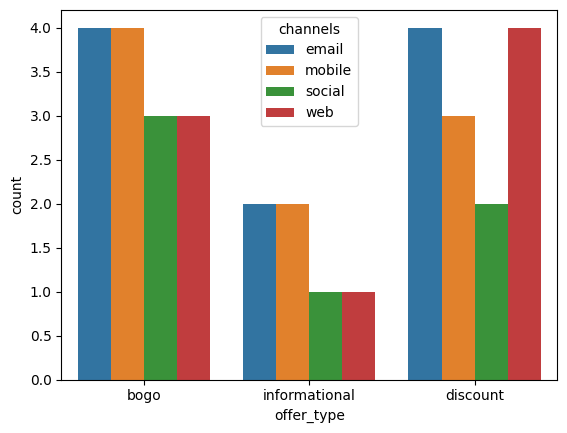

In [53]:
import ast
offers_df['channels'] =offers_df['channels'].apply(lambda x : ast.literal_eval(x) if isinstance (x,str) else x)
offers_exploded = offers_df.explode('channels')
sns.countplot(data= offers_exploded, x='offer_type' , hue= 'channels')

#### 7. Reward Value Frequency
Which reward values are most common

<Axes: title={'center': 'Reward Value Frequency'}, xlabel='reward'>

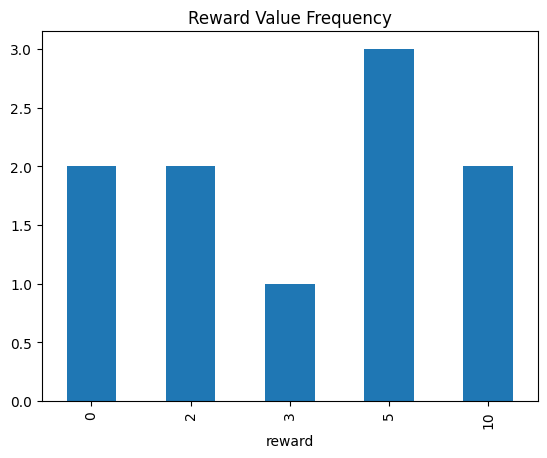

In [54]:
offers_df['reward'].value_counts().sort_index().plot(kind='bar' , title= 'Reward Value Frequency')

#### Data Preparation for Tableau Visualization

We merge all three dataframes to get a single table

In [55]:
# ✅ Step 1: Aggregate events_df to customer-level metrics

import pandas as pd
# 1. Count different event types
event_counts = events_df.groupby(['customer_id', 'event']).size().unstack(fill_value=0).reset_index()

# Rename for clarity
event_counts.rename(columns={
    'offer received': 'offers_received',
    'offer viewed': 'offers_viewed',
    'offer completed': 'offers_completed',
    'transaction': 'transactions_count'
}, inplace=True)

# 2. Total amount spent & reward
amount_reward = events_df.groupby('customer_id').agg(
    total_amount=('amount', 'sum'),
    total_reward=('reward', 'sum')
).reset_index()

event_counts.head()


event,customer_id,offers_completed,offers_received,offers_viewed,transactions_count
0,0009655768c64bdeb2e877511632db8f,3,5,4,8
1,00116118485d4dfda04fdbaba9a87b5c,0,2,2,3
2,0011e0d4e6b944f998e987f904e8c1e5,3,5,5,5
3,0020c2b971eb4e9188eac86d93036a77,3,5,3,8
4,0020ccbbb6d84e358d3414a3ff76cffd,3,4,4,12


In [56]:
amount_reward.head()

,customer_id,total_amount,total_reward
0,0009655768c64bdeb2e877511632db8f,127.6000,9.0000
1,00116118485d4dfda04fdbaba9a87b5c,4.0900,0.0000
2,0011e0d4e6b944f998e987f904e8c1e5,79.4600,13.0000
3,0020c2b971eb4e9188eac86d93036a77,196.8600,14.0000
4,0020ccbbb6d84e358d3414a3ff76cffd,154.0500,13.0000


In [57]:
# ✅ Step 2: Count offers by type per customer

# 1. Filter only offer-related events
offer_related = events_df[events_df['event'].isin(['offer received', 'offer viewed', 'offer completed'])]

# 2. Merge with offers info
offer_with_type = offer_related.merge(offers_df[['offer_id', 'offer_type']], on='offer_id', how='left')

# 3. Count number of offers received by type
offer_type_counts = offer_with_type[offer_with_type['event'] == 'offer received'] \
    .groupby(['customer_id', 'offer_type']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
offer_type_counts.rename(columns={
    'bogo': 'bogo_received',
    'discount': 'discount_received',
    'informational': 'informational_received'
}, inplace=True)

In [58]:
offer_with_type.head()

,customer_id,event,time,offer_id,amount,reward,day,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,bogo
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,0,discount
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,0,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,0,discount
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,0,bogo


In [59]:
offer_type_counts.head()

offer_type,customer_id,bogo_received,discount_received,informational_received
0,0009655768c64bdeb2e877511632db8f,1,2,2
1,00116118485d4dfda04fdbaba9a87b5c,2,0,0
2,0011e0d4e6b944f998e987f904e8c1e5,1,2,2
3,0020c2b971eb4e9188eac86d93036a77,2,2,1
4,0020ccbbb6d84e358d3414a3ff76cffd,2,1,1


In [60]:
# ✅ Step 3: Merge everything into one master table

# Start with customer profile
master_df = customers_df.copy()

# Merge event counts
master_df = master_df.merge(event_counts, on = 'customer_id' , how='left')

# Merge total amount & reward
master_df =master_df.merge(amount_reward, on = 'customer_id' , how='left' )

# Merge offer type counts
master_df =master_df.merge(offer_type_counts , on = 'customer_id' , how='left')

 # ✅ Step 4: Fill missing values with 0 for counts and amounts
cols_to_fill = [
    'offers_received', 'offers_viewed', 'offers_completed', 'transactions_count',
    'total_amount', 'total_reward', 'bogo_received', 'discount_received', 'informational_received'
]

master_df[cols_to_fill] = master_df[cols_to_fill].fillna(0)

master_df.head()

,customer_id,became_member_on,gender,age,income,offers_completed,offers_received,offers_viewed,transactions_count,total_amount,total_reward,bogo_received,discount_received,informational_received
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,Unknown,NaN,NaN,2,5,5,9,20.4000,5.0000,0.0000,5.0000,0.0000
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0000,112000.0000,1,2,0,3,77.0100,5.0000,1.0000,0.0000,1.0000
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,Unknown,NaN,NaN,0,2,2,6,14.3000,0.0000,1.0000,0.0000,1.0000
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0000,100000.0000,3,4,4,7,159.2700,20.0000,3.0000,0.0000,1.0000
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,Unknown,NaN,NaN,0,5,3,3,4.6500,0.0000,0.0000,3.0000,2.0000


In [61]:
master_df.shape

(17000, 14)

#### Feature Engineering

In [62]:
# ✅ Step 1: Add Engagement Metrics (Rates)
# Avoid division by zero by replacing 0 with NaN temporarily
master_df['view_rate'] = master_df['offers_viewed'] / master_df['offers_received'].replace(0, pd.NA)
master_df['completion_rate'] = master_df['offers_completed'] / master_df['offers_received'].replace(0, pd.NA)
master_df['utilization_rate'] = master_df['offers_completed'] / master_df['offers_viewed'].replace(0, pd.NA)


# ✅ Step 2: Add Spending & Transaction KPIs
# Spending behavior
master_df['avg_transaction_value'] = master_df['total_amount'] / master_df['transactions_count'].replace(0, pd.NA)
master_df['transactions_per_offer'] = master_df['transactions_count'] / master_df['offers_received'].replace(0, pd.NA)


# Reward metrics
master_df['reward_per_offer'] = master_df['total_reward'] / master_df['offers_received'].replace(0, pd.NA)
master_df['reward_per_transaction'] = master_df['total_reward'] / master_df['transactions_count'].replace(0, pd.NA)
master_df['reward_per_dollar'] = master_df['total_reward'] / master_df['total_amount'].replace(0, pd.NA)


# ✅ Step 3 Offer Type Distribution as %
# This helps understand each customer’s offer mix
master_df['bogo_pct'] = master_df['bogo_received'] / master_df['offers_received'].replace(0, pd.NA)
master_df['discount_pct'] = master_df['discount_received'] / master_df['offers_received'].replace(0, pd.NA)
master_df['informational_pct'] = master_df['informational_received'] / master_df['offers_received'].replace(0, pd.NA)

In [63]:
master_df.head()

,customer_id,became_member_on,gender,age,income,offers_completed,offers_received,offers_viewed,transactions_count,total_amount,total_reward,bogo_received,discount_received,informational_received,view_rate,completion_rate,utilization_rate,avg_transaction_value,transactions_per_offer,reward_per_offer,reward_per_transaction,reward_per_dollar,bogo_pct,discount_pct,informational_pct
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,Unknown,NaN,NaN,2,5,5,9,20.4000,5.0000,0.0000,5.0000,0.0000,1.0000,0.4000,0.4000,2.2667,1.8000,1.0000,0.5556,0.2451,0.0000,1.0000,0.0000
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0000,112000.0000,1,2,0,3,77.0100,5.0000,1.0000,0.0000,1.0000,0.0000,0.5000,<NA>,25.6700,1.5000,2.5000,1.6667,0.0649,0.5000,0.0000,0.5000
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,Unknown,NaN,NaN,0,2,2,6,14.3000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.3833,3.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0000,100000.0000,3,4,4,7,159.2700,20.0000,3.0000,0.0000,1.0000,1.0000,0.7500,0.7500,22.7529,1.7500,5.0000,2.8571,0.1256,0.7500,0.0000,0.2500
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,Unknown,NaN,NaN,0,5,3,3,4.6500,0.0000,0.0000,3.0000,2.0000,0.6000,0.0000,0.0000,1.5500,0.6000,0.0000,0.0000,0.0000,0.0000,0.6000,0.4000


In [65]:
master_df.shape

(17000, 25)

##### Exporting the final dataframe as csv to use it in Tableau for visualization

In [70]:
master_df.to_csv("customer_master_full1.csv" , index=False)